# Logistic Regression

Using Logistic Regression to classify flower type Iris data type

In [62]:
# importing dependencies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [63]:
# loading data
DATA_PATH = 'data/iris_dataset.csv'

df = pd.read_csv(DATA_PATH)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
# dropping NA 
df.dropna(axis = 0, how = 'any')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Pair-plot

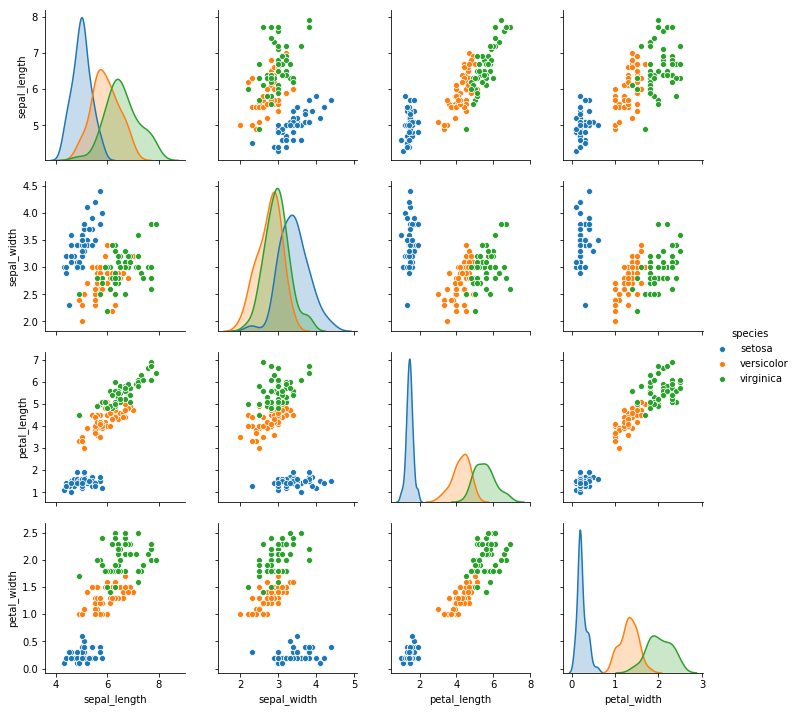

In [65]:
sns.pairplot(df, hue = 'species')
plt.show()

In [66]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Here we see the data is balanced with 3 classes, 50 samples each

# Logistic Regression
As simple logistic regression is a binary classification task, we will consider
two classes first. Hence, we will drop the third class for the time being

In [67]:
dfNew = df[df['species'] != 'virginica']
dfNew.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's plot the two classes using pairplot


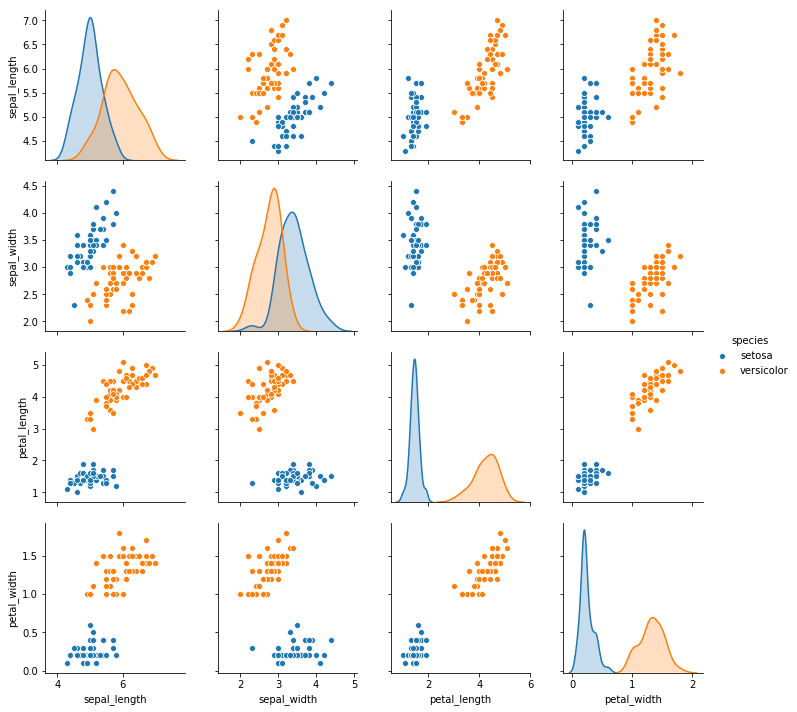

In [68]:
sns.pairplot(dfNew, hue = 'species')
plt.show()

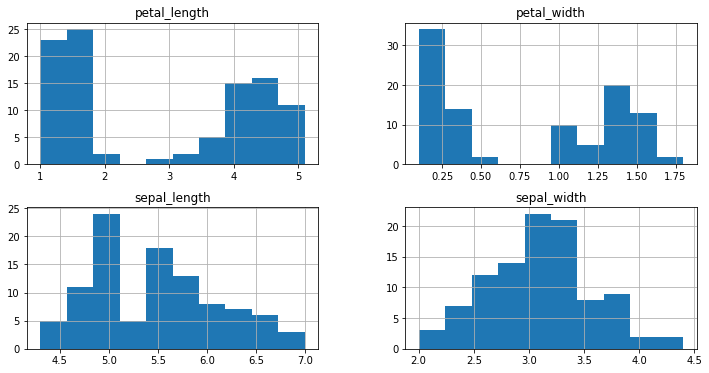

In [69]:
dfNew.hist(column = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length'], figsize = (12,6))
plt.show()

Here we don't see any anomalous behaviour in the histograms

# Binary Label Conversion
Here as there are only two labels, we can directly replace them by 0 and 1
0 -> versicolor
1 -> sentosa

In [70]:
dfNew['species'].replace(['setosa', 'versicolor'], [1, 0], inplace = True)

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [71]:
dfNew.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [72]:
# making X and Y

X = dfNew.drop(['species'], axis = 1)
Y = dfNew['species']

In [73]:
# scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.5810659 ,  0.85713543, -1.01435952, -1.03824799],
       [-0.89430898, -0.19845007, -1.01435952, -1.03824799],
       [-1.20755205,  0.22378413, -1.08374115, -1.03824799],
       [-1.36417359,  0.01266703, -0.94497788, -1.03824799],
       [-0.73768744,  1.06825253, -1.01435952, -1.03824799],
       [-0.11120129,  1.70160383, -0.80621461, -0.68329141],
       [-1.36417359,  0.64601833, -1.01435952, -0.8607697 ],
       [-0.73768744,  0.64601833, -0.94497788, -1.03824799],
       [-1.67741667, -0.40956718, -1.01435952, -1.03824799],
       [-0.89430898,  0.01266703, -0.94497788, -1.21572628],
       [-0.11120129,  1.27936963, -0.94497788, -1.03824799],
       [-1.05093052,  0.64601833, -0.87559625, -1.03824799],
       [-1.05093052, -0.19845007, -1.01435952, -1.21572628],
       [-1.8340382 , -0.19845007, -1.22250442, -1.21572628],
       [ 0.51528486,  1.91272093, -1.15312279, -1.03824799],
       [ 0.35866332,  2.75718933, -0.94497788, -0.68329141],
       [-0.11120129,  1.

In [74]:
# train test split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [75]:
print(xTrain.shape)
print(yTrain.shape)

(90, 4)
(90,)


In [76]:
yTrain = yTrain.values
yTest = yTest.values

# Model
Logistic Regression is nothing but a linear regression model with Sigmoid Activation

In [77]:
def create_weights(featureNum):
    
    # weight matrix would be a matrix containing the values for parameters of model
    # the number of features
    # bias will represent the intercept
    W = np.zeros((1, featureNum))
    B = 0
    return W, B

In [78]:
def sigmoid(inp):
    
    # here inp can be a np matrix
    out = 1 / (1 + np.exp(-inp))
    return out
    

In [79]:
def model(X, Y, W, B):
    
    # log. reg is sigmoid of L.R
    hx = sigmoid(np.dot(W, np.transpose(X)) + B)
    
    #total samples
    m = X.shape[0]
    
    # cost Function
    cost = (-1/m) * np.sum(Y.T * np.log(hx) + (1-Y.T) * np.log(1 - hx))
    
    # gradient calculations
    dw = (1/m) * np.dot(X.T, (hx - Y.T).T)
    db = (1/m) * np.sum(hx - Y.T)
    
    gradients = {"dw" : dw, "db" : db}
    return gradients, cost 
    

In [80]:
EPOCHS = 4500
LEARNING_RATE = 0.001

In [81]:
def train(W, B, X, Y, lr = LEARNING_RATE, epochs = EPOCHS):
    
    losses = []
    for i in range(epochs):
        
        # calculate loss and gradients
        grad, loss = model(X, Y, W, B)
        
        # update weights using Gradient Descent
        W = W - lr * grad["dw"].T
        
        B = B - lr * grad["db"]
        
        if i%100 == 0:
            losses.append(loss)
            
    # final fitted parameters
    coefficients = {"W": W, "B": B}
    finalGradients = grad
    
    return coefficients, finalGradients, losses

In [82]:
def predict(x, coefficients):
    
    # count number of samples in x
    m = x.shape[0]
    
    # take out weigthts
    w = coefficients["W"]
    b = coefficients["B"]
    
    # put into model
    tx = sigmoid(np.dot(w, np.transpose(x)) + b)
    
    # make output array
    predictions = np.zeros((1, m))
    
    # add predictions
    for i in range(tx.shape[1]):
        if tx[0][i] > 0.5:
            predictions[0][i] == 1
    
    return predictions
    

# Feeding in data

In [87]:
NUM_FEATURES = xTrain.shape[1]

#initialize weight
W, B = create_weights(NUM_FEATURES)

# begin training
coeff, grads, losss = train(W, B, xTrain, yTrain)

# make predictions 
outPredictions = predict(xTrain, coeff)
print('Test Accuracy: ', accuracy_score(outPredictions.T, yTrain))

Test Accuracy:  0.5333333333333333


In [85]:
print('final coefficients: ', coeff["W"])
print('final intercept: ', coeff["B"])

final coefficients:  [[-0.54549167  0.62669459 -0.82119942 -0.81710431]]
final intercept:  -0.059784951522027764


# Plotting Loss function of training

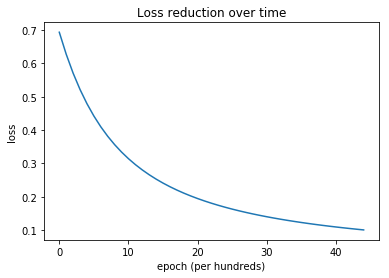

In [86]:
plt.plot(losss)
plt.ylabel('loss')
plt.xlabel('epoch (per hundreds)')
plt.title('Loss reduction over time')
plt.show()